In [1]:
"""notre problème c'est de savoir si le patient est atteint du diabète.
et ce probléme coresspond à un problème de classification en machine learning vu qu'en sortie on a deux classe (binaire)
'diabetes.csv': Cet ensemble de données provient de l'Institut national du diabète et des maladies digestives et rénales.
L'objectif est de prédire sur la base de mesures diagnostiques, si un patient est atteint de diabète
Plusieurs contraintes ont été placées sur la sélection de ces instances à partir d'une plus grande base de données.
En particulier, tous les patients ici sont des femmes d'au moins 21 ans. 
-L'ensemble des colonnes et leurs significations
Pregnancies: Nombre de fois enceinte
Glucose: Concentration plasmatique de glucose à 2 heures dans un test oral de tolérance au glucose
BloodPressure: Pression sanguine diastolique (mm Hg)
SkinThickness: Épaisseur du pli cutané du triceps (mm)
Insulin: Insuline sérique 2 heures (mu U/ml)
BMI: Indice de masse corporelle (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Fonction généalogique du diabète
Age: Age (years)
Outcome: Class variable (0 or 1)
"""

"notre problème c'est de savoir si le patient est atteint du diabète.\net ce probléme coresspond à un problème de classification en machine learning vu qu'en sortie on a deux classe (binaire)\n'diabetes.csv': Cet ensemble de données provient de l'Institut national du diabète et des maladies digestives et rénales.\nL'objectif est de prédire sur la base de mesures diagnostiques, si un patient est atteint de diabète\nPlusieurs contraintes ont été placées sur la sélection de ces instances à partir d'une plus grande base de données.\nEn particulier, tous les patients ici sont des femmes d'au moins 21 ans. \n-L'ensemble des colonnes et leurs significations\nPregnancies: Nombre de fois enceinte\nGlucose: Concentration plasmatique de glucose à 2 heures dans un test oral de tolérance au glucose\nBloodPressure: Pression sanguine diastolique (mm Hg)\nSkinThickness: Épaisseur du pli cutané du triceps (mm)\nInsulin: Insuline sérique 2 heures (mu U/ml)\nBMI: Indice de masse corporelle (weight in kg/

# Importation des bibliothèque. 

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Charger le jeu de données et afficher les 5 premières lignes

In [3]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#la fonction describe retourne tous les caluculs statistiques
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#retouner le nombre de valeurs uniques,dans l'ordre décroissant de sorte que le premier élément soit l'élément le plus fréquent.
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# Visualisation des données

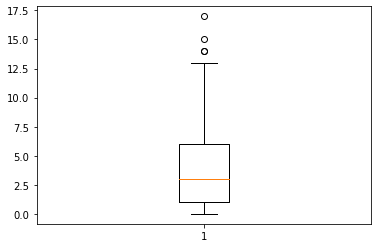

In [8]:

plt.boxplot(data["Pregnancies"])
plt.show()

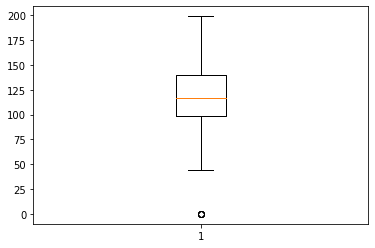

In [9]:
plt.boxplot(data["Glucose"])
plt.show()

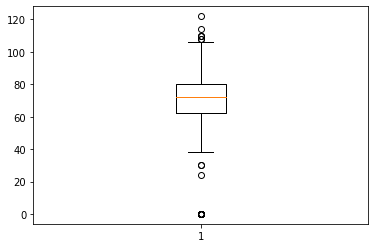

In [10]:
plt.boxplot(data["BloodPressure"])
plt.show()

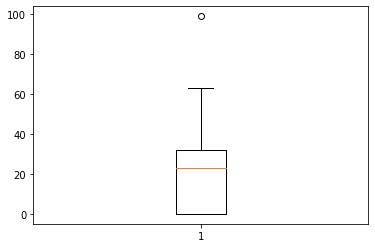

In [11]:
plt.boxplot(data["SkinThickness"])
plt.show()

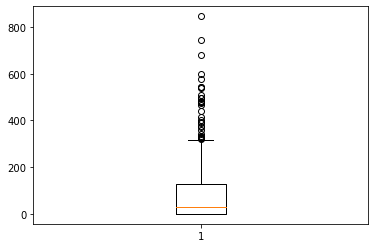

In [12]:
plt.boxplot(data["Insulin"])
plt.show()

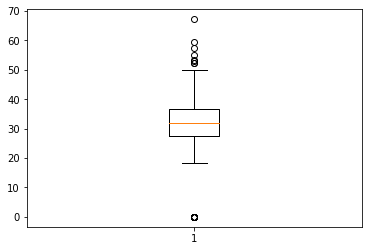

In [13]:
plt.boxplot(data["BMI"])
plt.show()

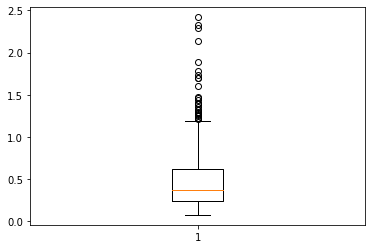

In [14]:
plt.boxplot(data["DiabetesPedigreeFunction"])
plt.show()

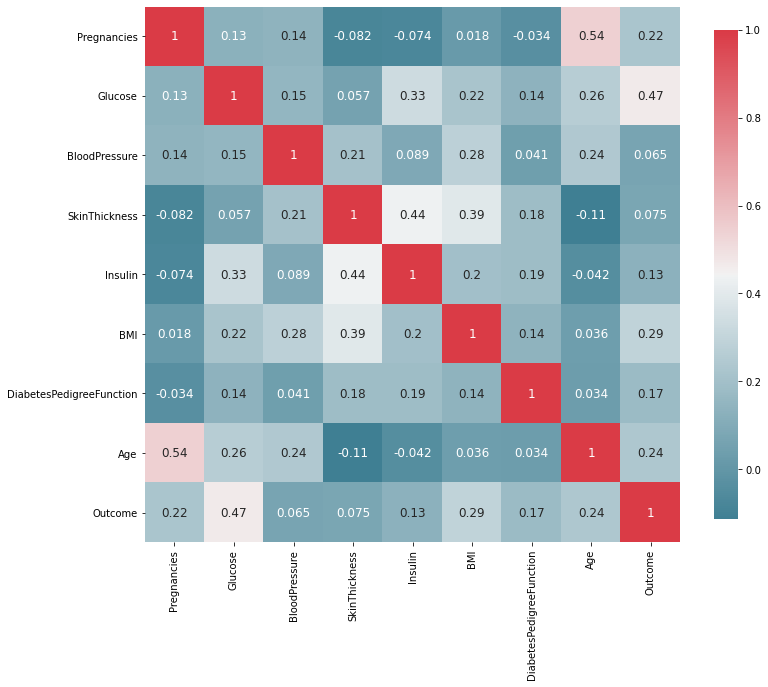

In [15]:
#la matrice de corrélation
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(data)

In [16]:
#les variables qui sont suffisament corrélées avec la variable 'Outcome' sont : 'Age','BMI','Glucose','pregnancies'
#col = ['BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Outcome']

In [17]:
# séparer les données et les étiquettes
X = data.drop(columns = 'Outcome', axis=1)
Y = data['Outcome']

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)

In [19]:
#normalisation des données
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# modèle choisit :  SVM model

In [20]:
svm_classifier = svm.SVC(kernel='linear')

In [21]:
svm_classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [22]:
# accuracy score on the training data
X_train_prediction = svm_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [23]:
# accuracy score on the test data
svm_prediction = svm_classifier.predict(X_test)

In [24]:
svm_data = pd.DataFrame({'Actual' : Y_test, 'Predicted' : svm_prediction})
svm_data

,Actual,Predicted
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
476,1,0
482,0,0
230,1,1
527,0,0


In [25]:
CM=confusion_matrix(Y_test,svm_prediction)
print(CM)

[[98  9]
 [18 29]]


In [26]:
svm_accuracy = accuracy_score(svm_prediction, Y_test)*100
print('Accuracy score of the test data : ', svm_accuracy)

Accuracy score of the test data :  82.46753246753246


In [27]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = svm_classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


# implémentation d'autres modèles

# KNN Model

In [28]:
knn_classifier=KNeighborsClassifier(n_neighbors=13,metric='euclidean')
model=knn_classifier.fit(X_train,Y_train)

In [29]:
knn_y_pred=knn_classifier.predict(X_test)


In [30]:
knn_data = pd.DataFrame({'Actual' : Y_test, 'Predicted' : knn_y_pred})
knn_data

,Actual,Predicted
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
476,1,0
482,0,0
230,1,0
527,0,0


In [31]:
CM=confusion_matrix(Y_test,knn_y_pred)
print(CM)

[[92 15]
 [19 28]]


In [32]:
knn_accuracy = accuracy_score(Y_test,knn_y_pred)*100
print("Model Accuracy: ",knn_accuracy,"%")

Model Accuracy:  77.92207792207793 %


In [33]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = knn_classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


# Logistic Regression

In [34]:
logreg = LogisticRegression()  
logreg.fit(X_train, Y_train) 
    


LogisticRegression()

In [35]:
logreg_prediction  = logreg.predict(X_test)

In [36]:
Logreg_data = pd.DataFrame({'Actual' : Y_test, 'Predicted' : logreg_prediction})
Logreg_data

,Actual,Predicted
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
476,1,0
482,0,0
230,1,1
527,0,0


In [37]:
CM=confusion_matrix(Y_test,logreg_prediction)
print(CM)

[[98  9]
 [18 29]]


In [38]:
logreg_accuracy = accuracy_score(Y_test,logreg_prediction)*100
print("Model Accuracy: ",logreg_accuracy,"%")

Model Accuracy:  82.46753246753246 %


In [39]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = logreg.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


# Decision Tree

In [40]:
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [41]:
DT_prediction = model_DTC.predict(X_test)


In [42]:
DT_data = pd.DataFrame({'Actual' : Y_test, 'Predicted' : DT_prediction})
DT_data

,Actual,Predicted
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
476,1,0
482,0,0
230,1,0
527,0,0


In [43]:
CM=confusion_matrix(Y_test,DT_prediction)
print(CM)

[[86 21]
 [12 35]]


In [44]:
DT_accuracy = accuracy_score(Y_test,DT_prediction)*100
print("Model Accuracy: ",DT_accuracy,"%")

Model Accuracy:  78.57142857142857 %


In [45]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_DTC.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


# comparaison

In [46]:
Ml_model=['SVM model', 'KNN Model', 'Logistic Regression', 'Decision Tree']
Accuracy_score = [svm_accuracy, knn_accuracy, logreg_accuracy, DT_accuracy]
comparaison_data = pd.DataFrame({'Model' : Ml_model, 'Accuracy_score' : Accuracy_score})
comparaison_data

,Model,Accuracy_score
0,SVM model,82.467532
1,KNN Model,77.922078
2,Logistic Regression,82.467532
3,Decision Tree,78.571429


en conclusion: les deux modèles SVM et LOGISTIC REGRESSION sont plus performant que le KNN et DECISION TREE